In [163]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
plt.style.use('seaborn-deep')
import seaborn as sns
sns.set_style("whitegrid")
np.random.seed(42)
%matplotlib inline

In [132]:
heroes_info = pd.read_csv("heroes_information.csv")
heroes_info.drop(heroes_info.columns[0], axis=1, inplace=True)
heroes_info = heroes_info.rename(columns={'name':'hero_names'})
heroes_powers = pd.read_csv("super_hero_powers.csv")
heroes_powers.sample(5)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
660,X-Man,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
158,Claire Bennet,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
634,Venompool,True,True,False,True,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,False
235,Firestar,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
635,Vertigo II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


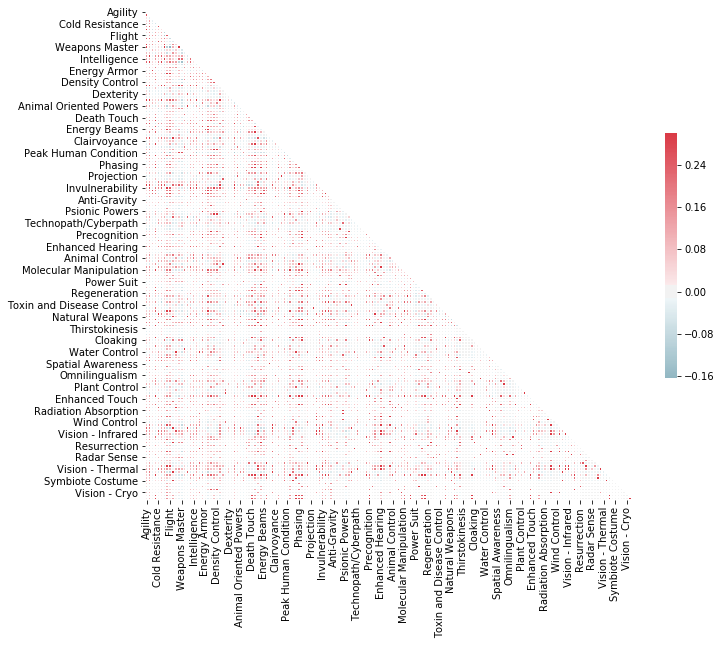

In [133]:
corr = heroes_powers.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [134]:
powers = heroes_powers.corr().columns.values
for col, row in ((heroes_powers.corr().abs() > 0.4) & (heroes_powers.corr().abs() < 1)).iteritems():
    if (len(powers[row.values])>0):
        print(col, powers[row.values]) 

Agility ['Stamina' 'Reflexes']
Lantern Power Ring ['Energy Armor']
Dimensional Awareness ['Teleportation' 'Astral Projection' 'Time Manipulation' 'Reality Warping']
Cold Resistance ['Heat Resistance']
Durability ['Super Strength']
Stealth ['Marksmanship' 'Weapons Master']
Danger Sense ['Wallcrawling' 'Web Creation' 'Symbiote Costume']
Underwater breathing ['Water Control' 'Sub-Mariner']
Marksmanship ['Stealth' 'Weapons Master']
Weapons Master ['Stealth' 'Marksmanship']
Animal Attributes ['Animal Oriented Powers']
Super Strength ['Durability' 'Super Speed']
Telepathy ['Telekinesis' 'Astral Projection']
Energy Armor ['Lantern Power Ring']
Energy Blasts ['Force Fields']
Stamina ['Agility' 'Reflexes']
Audio Control ['Sonic Scream']
Super Speed ['Super Strength' 'Reflexes']
Animal Oriented Powers ['Animal Attributes']
Teleportation ['Dimensional Awareness']
Telekinesis ['Telepathy' 'Astral Projection' 'Illusions']
Power Sense ['Projection']
Element Control ['Omnipresent' 'Omniscient']
Phasi

In [135]:
powers_cat = {
    'Vision':['hero_names','Vision - X-Ray','Vision - Telescopic',
               'Vision - Microscopic', 'Vision - Night',
              'Vision - Heat'],
    'Reality Distortion':['hero_names','Reality Warping', 'Dimensional Awareness', 'Omnipotent',
                         'Omnipresent', 'Omniscient', 'Dimensional Awareness', 
                         'Time Manipulation','Dimensional Travel','Shapeshifting'],
    'Strength':['hero_names','Durability','Super Strength','Super Speed','Stamina','Reflexes',
               'Energy Armor','Force Fields'],
    'Thermal':['hero_names','Cold Resistance','Energy Absorption','Heat Resistance',
               'Fire Resistance']
}

In [136]:
#vision = heroes_powers[powers_cat['Vision']]
vision = heroes_powers[(heroes_powers[powers_cat['Vision']] == True).any(axis=1)][powers_cat['Vision']]
vision.sample(5)

,hero_names,Vision - X-Ray,Vision - Telescopic,Vision - Microscopic,Vision - Night,Vision - Heat
601,Thanos,False,False,False,False,True
416,Miss Martian,True,False,False,False,False
302,Hyperion,True,False,True,False,True
61,Batman,False,False,False,True,False
101,Blade,False,True,False,True,False


In [137]:
reality_dis = heroes_powers[(heroes_powers[powers_cat['Reality Distortion']] == True).any(axis=1)][powers_cat['Reality Distortion']]
strength = heroes_powers[(heroes_powers[powers_cat['Strength']] == True).any(axis=1)][powers_cat['Strength']]
thermal = heroes_powers[(heroes_powers[powers_cat['Thermal']] == True).any(axis=1)][powers_cat['Thermal']]

In [138]:
print (vision.shape, reality_dis.shape, strength.shape, thermal.shape)

(67, 6) (107, 10) (488, 8) (131, 5)


In [139]:
vision_heroes = set(list(vision.hero_names))
reality_dist_heroes = set(list(reality_dis.hero_names))
strength_heroes = set(list(strength.hero_names))
thermal_heroes = set(list(thermal.hero_names))

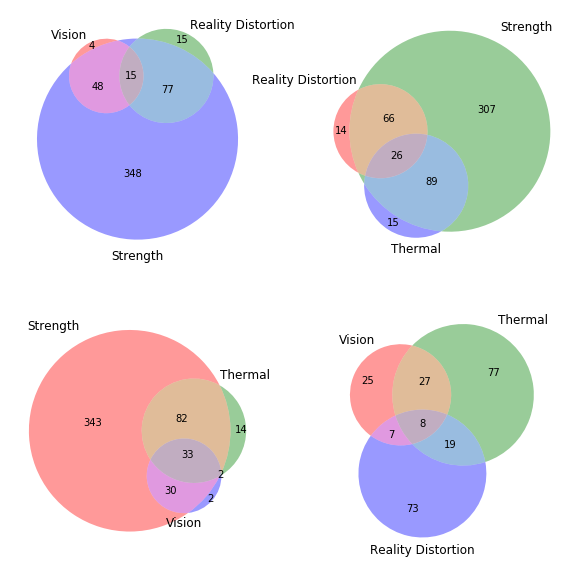

In [140]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
venn3([vision_heroes, reality_dist_heroes, strength_heroes], 
      ('Vision', 'Reality Distortion', 'Strength'), ax = ax[0][0])
venn3([reality_dist_heroes, strength_heroes, thermal_heroes], 
      ('Reality Distortion', 'Strength', 'Thermal'), ax = ax[0][1])
venn3([strength_heroes, thermal_heroes, vision_heroes], 
      ('Strength', 'Thermal', 'Vision'), ax = ax[1][0])
venn3([vision_heroes, thermal_heroes, reality_dist_heroes], 
      ('Vision', 'Thermal', 'Reality Distortion'), ax = ax[1][1])

In [141]:
thermal_hero_prop = pd.merge(heroes_info, thermal, on='hero_names')
thermal_hero_prop.replace([-99, np.NaN],0, inplace=True)
realDis_hero_prop = pd.merge(heroes_info, reality_dis, on='hero_names')
realDis_hero_prop.replace(-99,0, inplace=True)
vision_hero_prop = pd.merge(heroes_info, reality_dis, on='hero_names')
vision_hero_prop.replace(-99,0, inplace=True)

In [142]:
thermal_hero_prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 14 columns):
hero_names           132 non-null object
Gender               132 non-null object
Eye color            132 non-null object
Race                 132 non-null object
Hair color           132 non-null object
Height               132 non-null float64
Publisher            132 non-null object
Skin color           132 non-null object
Alignment            132 non-null object
Weight               132 non-null float64
Cold Resistance      132 non-null bool
Energy Absorption    132 non-null bool
Heat Resistance      132 non-null bool
Fire Resistance      132 non-null bool
dtypes: bool(4), float64(2), object(8)
memory usage: 11.9+ KB


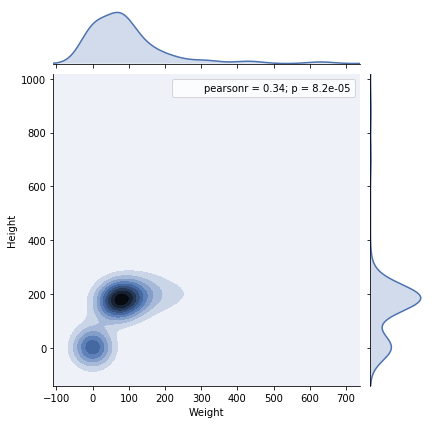

In [143]:
sns.jointplot(thermal_hero_prop.Weight, thermal_hero_prop.Height, 
              data=thermal_hero_prop, kind='kde')
#plt.title("Height & Weight of heroes with Thermal abilities")

Text(0.5,0,'Count')

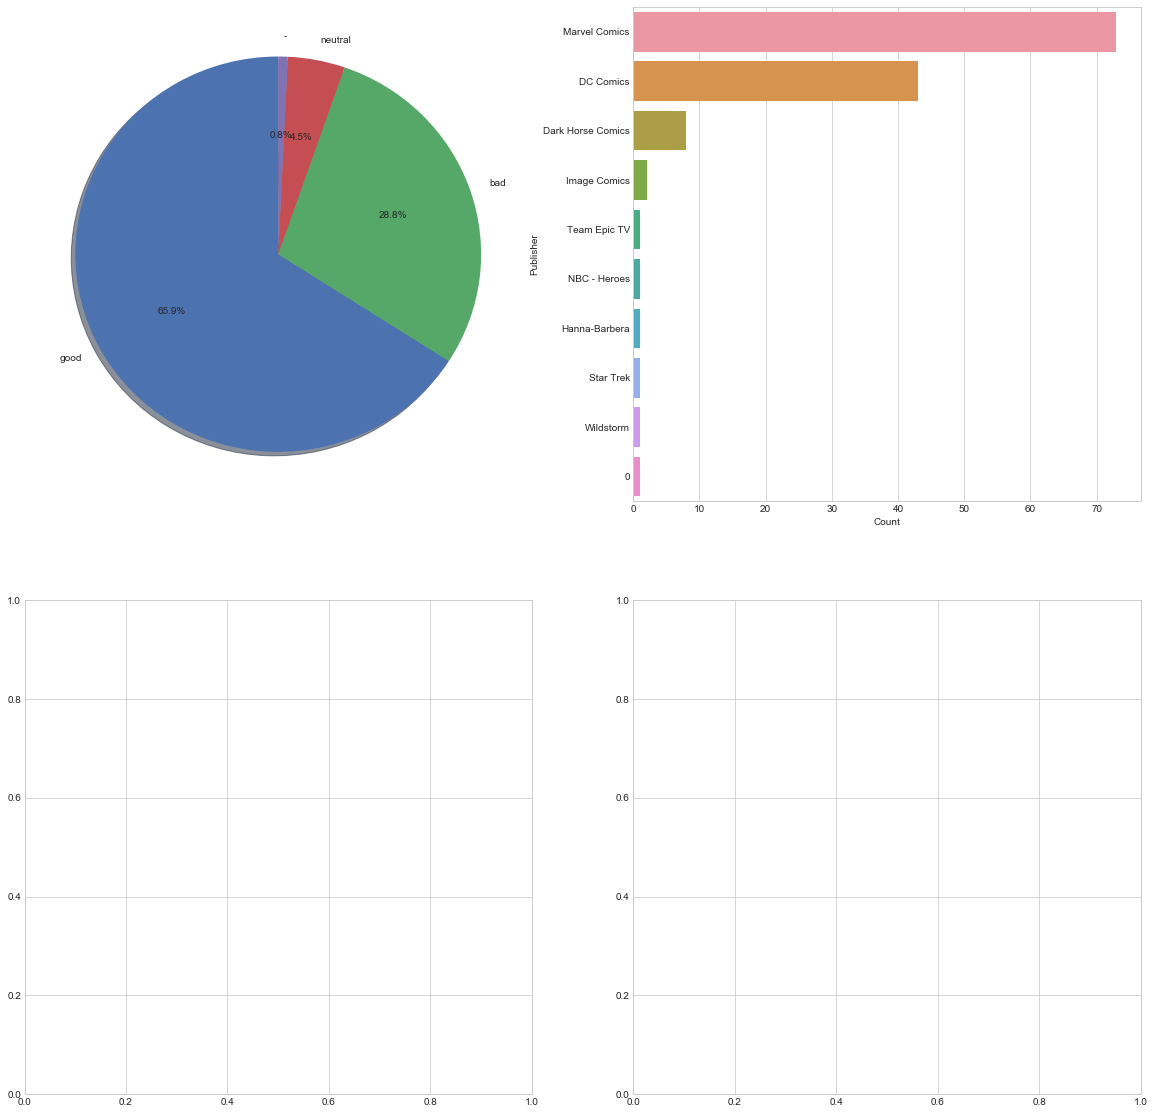

In [164]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
explode = (0, 0.1, 0, 0)
x = ax[0][0].pie(list(thermal_hero_prop['Alignment'].value_counts()),
             labels=list(thermal_hero_prop['Alignment'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)
sns.barplot(x = 'Publisher', y='index', 
            data=pd.DataFrame(thermal_hero_prop.Publisher.value_counts()).reset_index(), 
            orient='h',ax=ax[0][1])
ax[0][1].set_ylabel('Publisher')
ax[0][1].set_xlabel('Count')

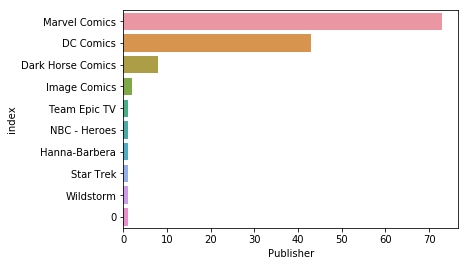

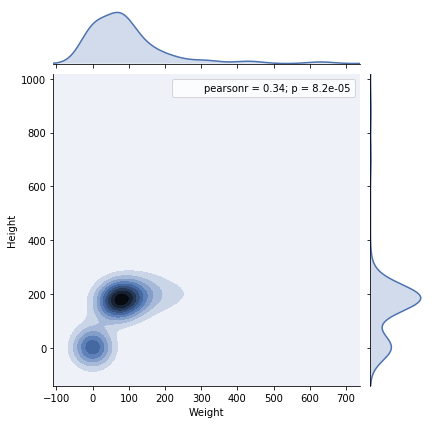